In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

Phi: 104.725194 +/- 0.754889
Theta: 41.629279 or +/- 0.528898
Phi(naive): 100.112000
Theta(naive): 46.756562


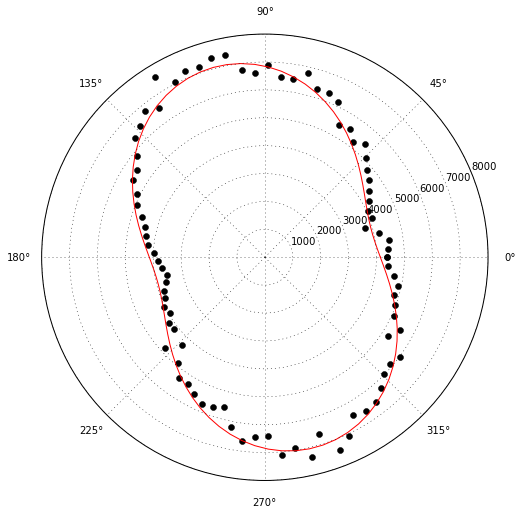

In [2]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 1mW scan 2 Dot1 B0V Rotor scan 2.txt')
t[:,1] = t[:,1]-2000
OrientPol(t)

Phi: 103.968608 +/- 1.101975
Theta: 40.846612 or +/- 0.756172
Phi(naive): -85.955000
Theta(naive): 62.832863


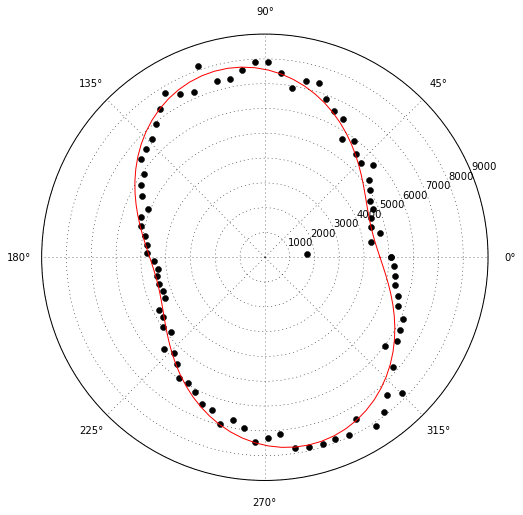

In [4]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 1mW scan 2 Dot1 B0V Rotor scan 1.txt')
t[:,1] = t[:,1]-2000
OrientPol(t)

Phi: 90.311339 +/- 0.864291
Theta: 29.552449 or +/- 0.427135
Phi(naive): 96.067000
Theta(naive): 33.377400


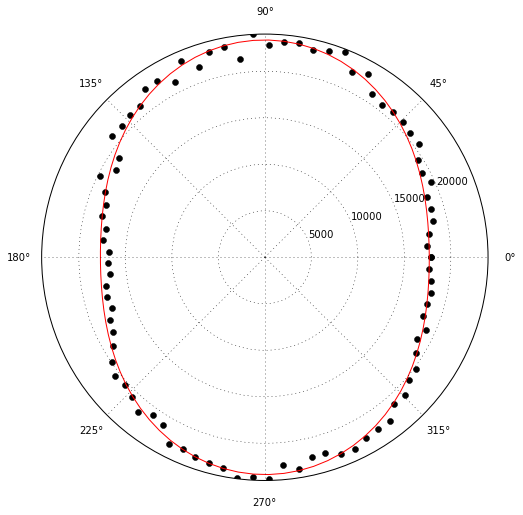

In [8]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 2 Dot1 B0V Rotor scan 2.txt')
t[:,1] = t[:,1]-10000
OrientPol(t)

Phi: 102.352908 +/- 0.669179
Theta: 32.781101 or +/- 0.367234
Phi(naive): 104.157000
Theta(naive): 36.798340


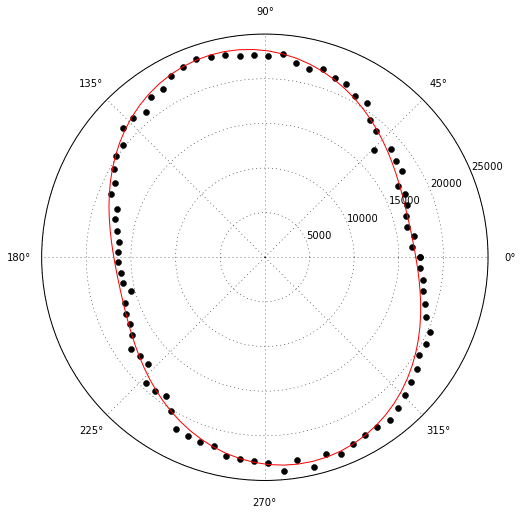

In [9]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 2 Dot1 B0V Rotor scan 1.txt')
t[:,1] = t[:,1]-10000
OrientPol(t)

X field: 4.73 +/- 0.39 mT 
Y field: 8.77 +/- 0.03 mT 
Z field: 6.35 +/- 0.03 mT
B: 13.04 +/- 0.29
Phi: 61.68 +/- 0.49
Theta: 49.82 or 130.18


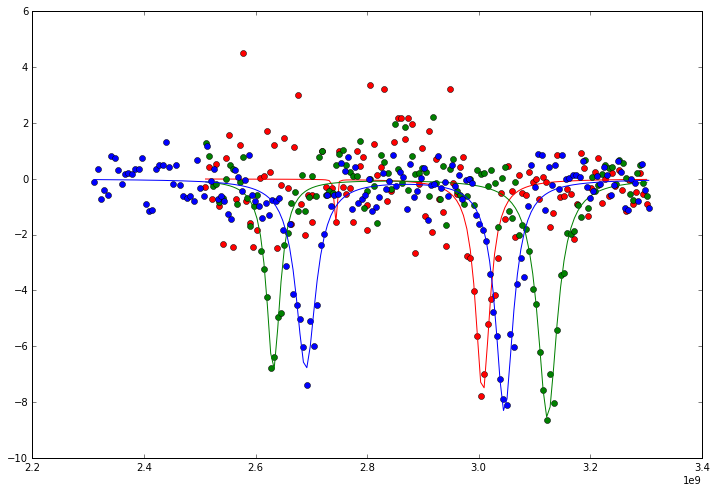

In [11]:
X=np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 2 Dot1 B0.5V T0 ODMR')
Y=np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 2 Dot1 B0.5V T90 ODMR')
Z=np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 2 Dot1 B0.5V T0 X15_4 ODMR 2')

OrientODMR(X,Y,Z)

X field: 4.02 +/- 0.04 mT 
Y field: 8.75 +/- 0.03 mT 
Z field: 6.35 +/- 0.03 mT
B: 12.79 +/- 0.06
Phi: 65.31 +/- 0.40
Theta: 48.85 or 131.15


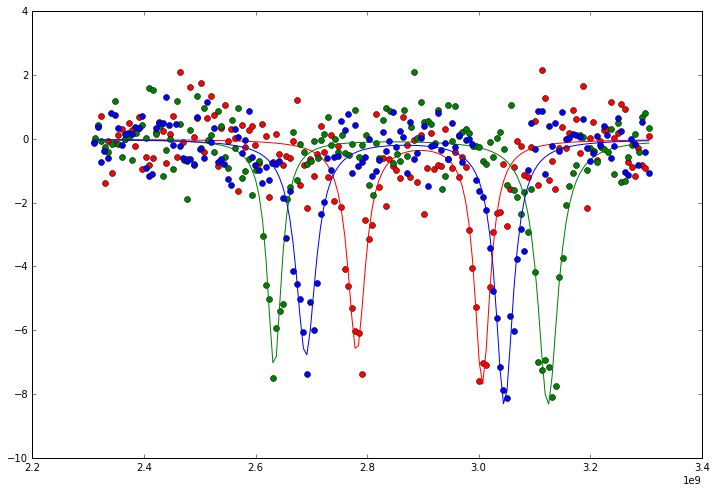

In [12]:
X=np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 2 Dot1 B0.5V T0 ODMR 2')
Y=np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 2 Dot1 B0.5V T90 ODMR 2')
Z=np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 2 Dot1 B0.5V T0 X15_4 ODMR 2')

OrientODMR(X,Y,Z)

In [13]:
np.mean([16.4,11.5,20.6,9.2,11.1])

13.76

In [14]:
np.mean([8.2,9.5,8.3,16,3])

9.0

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh import palettes
output_notebook()
TOOLS = "box_zoom,box_select,crosshair,hover,resize,reset"

Loading BokehJS ...

In [23]:
import pandas as pd
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 3 x80 y60 Dot1 T65 d6_1 *V.txt')
output_file("6-23-16 MNP Dot 1 ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,2.5,len(files))*(11/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
p.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
show(p)

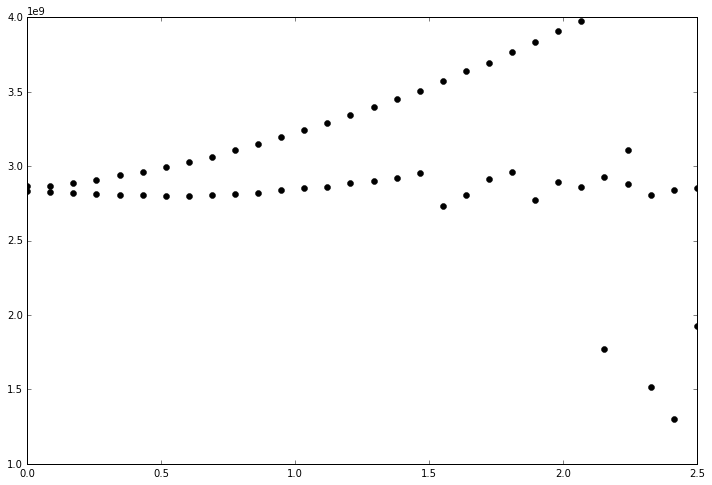

In [24]:
freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],6))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]
    opt, cov = curve_fit(ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9,1E7),maxfev=2500)
    fits[i,:] = opt
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
plt.plot(Bs*0.5/11,mins,'ko')
plt.plot(Bs*0.5/11,maxs,'ko')

In [27]:
opt1, cov1 = curve_fit(ODMR_theory_min,Bs[0:14],mins[0:14],p0=(np.pi/4))
print "%2f +/- %2f" % (opt1*180/np.pi,np.sqrt(np.diag(cov1))[0]*180/np.pi)
opt2, cov2 = curve_fit(ODMR_theory_max,Bs,maxs,p0=(np.pi/4))
print "%2f +/- %2f" % (opt2*180/np.pi,np.sqrt(np.diag(cov2))[0]*180/np.pi)

p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
p.line(Bs,ODMR_theory_min(Bs,*opt1),line_dash=(6,6),line_color='black')
p.line(Bs,ODMR_theory_min(Bs,*opt2),line_dash=(6,6),line_color='black')
show(p)

71.316288 +/- 0.477321
-90.004009 +/- 8393.936081


In [21]:
import pandas as pd
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\6-22-16\MNP on CPW 5mW scan 2 Dot1 T118_5 d4_9 *V.txt')
output_file("6-23-16 MNP Dot 1 ODMR 2.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,0.78,len(files))*(11/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
p.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
show(p)